In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [19]:
df = pd.read_csv('tiktok_top_1000.csv', index_col=0)
df.head()

,rank,account,subscribers_count,views_avg.,likes_avg.,comments_avg.,shares_avg.
0,1,billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0
1,2,badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0
2,3,chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0
3,4,charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0
4,5,yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0


Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.

    Este calculo lo necesitamos para luego obtener los residuos.

In [20]:
x=df['subscribers_count'].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.
y= df['views_avg.'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

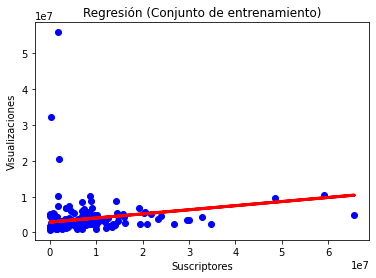

In [22]:
plt.scatter(x_test,y_test,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Suscriptores')
plt.ylabel('Visualizaciones')
plt.show()

Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple. Interpreta los resultados. ¿Cumple las asunciones de linealidad?

    Para comprobar la validez de la regresión vamos a chequear las 4 asunciones. Si se cumplen es que nuestras variables se ajustan a este tipo de regresión.

In [23]:
residuals = (y_test - y_prediction) #Calculamos los residuos para comprobar las asunciones.

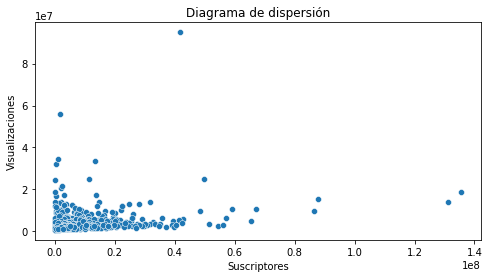

In [24]:
#Linealidad
plt.figure(figsize =(8,4))
fig = sns.scatterplot(x='subscribers_count' , y='views_avg.' , data = df, ci= None)
fig.set(xlabel='Suscriptores', ylabel = 'Visualizaciones')
fig.set_title('Diagrama de dispersión')
plt.show()


In [26]:
df['subscribers_count'].corr(df['views_avg.'])

0.24517683678212196

    Podemos observar que en nuestra gráfica si trazaramos una línea recta, los puntos estarían alrededor de esta. Es decir, hay relación entre nuestras variables independiente y la dependiente, por lo tanto se cumple la condición.

    Como vemos al obtener la correlación de nuestras variable, podemos decir que si que tienen relación pero sería una candidata a reajustarla, ya que el valor es más cercano a 0.

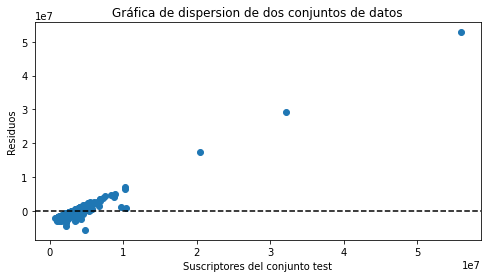

In [27]:
#Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Suscriptores del conjunto test')
ax.set_ylabel('Residuos')
plt.show()

    En esta gráfica vemos que el conjunto de datos no es muy independiente, solo parcialmente porque no parece que los residuos esten distribuidos de forma aleatoria alrededor de y= 0.

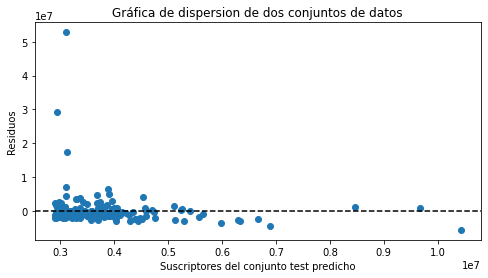

In [28]:
# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Suscriptores del conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

    Vemos en la gráfica los residuos frente a los valores predichos para la variable dependiente.
    
    Nuestros datos no presentan heterocesteidad pero tampoco homocedasticidad, ya que no hay el mismo número de valores, arriba de la línea que abajo, por lo que seguramente con algún pequeño ajuste podríamos hacerlos homogéneos.

/home/adalaber/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


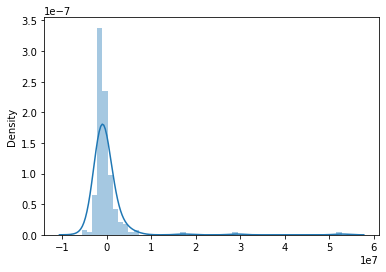

/home/adalaber/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


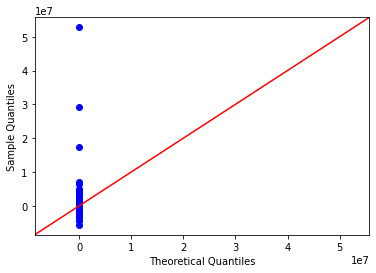

In [29]:
# 4. Normalidad

fig = plt.figure()
sns.distplot(residuals)
plt.show()
sm.qqplot(residuals, line = '45')
py.show()

    Finalmente realizando un QQplot, podemos ver que no estan distribuidos de forma normal a lo largo de la línea central. Por lo que no se cumple la condicion de Normalidad.